In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
# load data
confirmed_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
deaths_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
confirmed_US_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv')
deaths_US_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv')

In [3]:
# extract EU data
EU = ["Austria","Albania","Armenia","Belgium","Bulgaria","Croatia","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland","Ireland","Italy","Lativia","Lithuania","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden","UK","Russia","Switzerland","Ukraine","Belarus","Norway","San Marino","Moldova","Malta","Liechtenstein","Luxembourg"]
confirmed_EU = confirmed_data[confirmed_data['Country/Region'].isin(EU)]
confirmed_EU = confirmed_EU.iloc[:,4:].sum(axis=0)
deaths_EU = deaths_data[deaths_data['Country/Region'].isin(EU)]
deaths_EU = deaths_EU.iloc[:,4:].sum(axis=0)

In [12]:
# extract US data
confirmed_US = confirmed_US_data.iloc[:,11:].sum(axis=0)
deaths_US = deaths_US_data.iloc[:,12:].sum(axis=0)
type(confirmed_US)

pandas.core.series.Series

In [5]:
import matplotlib.pyplot as plt

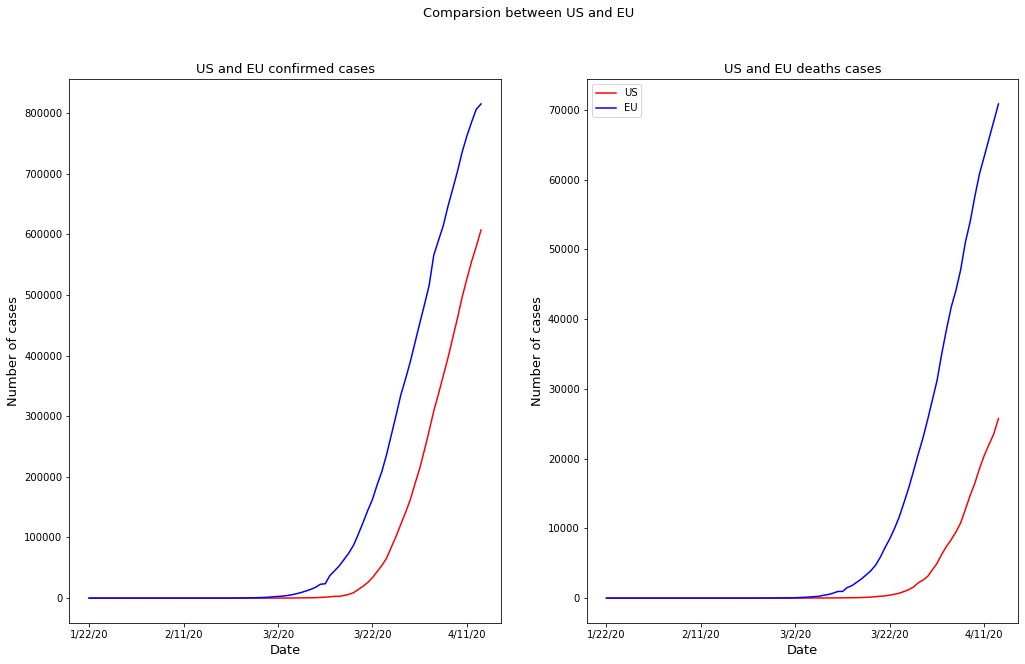

In [6]:
# plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(17,10))
confirmed_US.plot(ax=ax1,color='r',label = 'US')
deaths_US.plot(ax=ax2,color='r',label = 'US')
confirmed_EU.plot(ax=ax1,color='b',label = 'EU')
deaths_EU.plot(ax=ax2,color='b',label = 'EU')
# setting
fig.suptitle('Comparsion between US and EU', size=13)
ax1.set_title("US and EU confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
ax2.set_title("US and EU deaths cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)
# show
plt.legend()
plt.savefig("../graphs/Comparsion between US and EU")

In [7]:
move = 8
days_EU = len(confirmed_EU.index)
days_US = len(confirmed_US[move:].index)
confirmed_EU_2 = pd.Series(confirmed_EU.values, [i for i in range(days_EU)])
deaths_EU_2 = pd.Series(deaths_EU.values, [i for i in range(days_EU)])
confirmed_US_2 = pd.Series(confirmed_US.values[move:], [i for i in range(days_US)])
deaths_US_2 = pd.Series(deaths_US.values[move:], [i for i in range(days_US)])

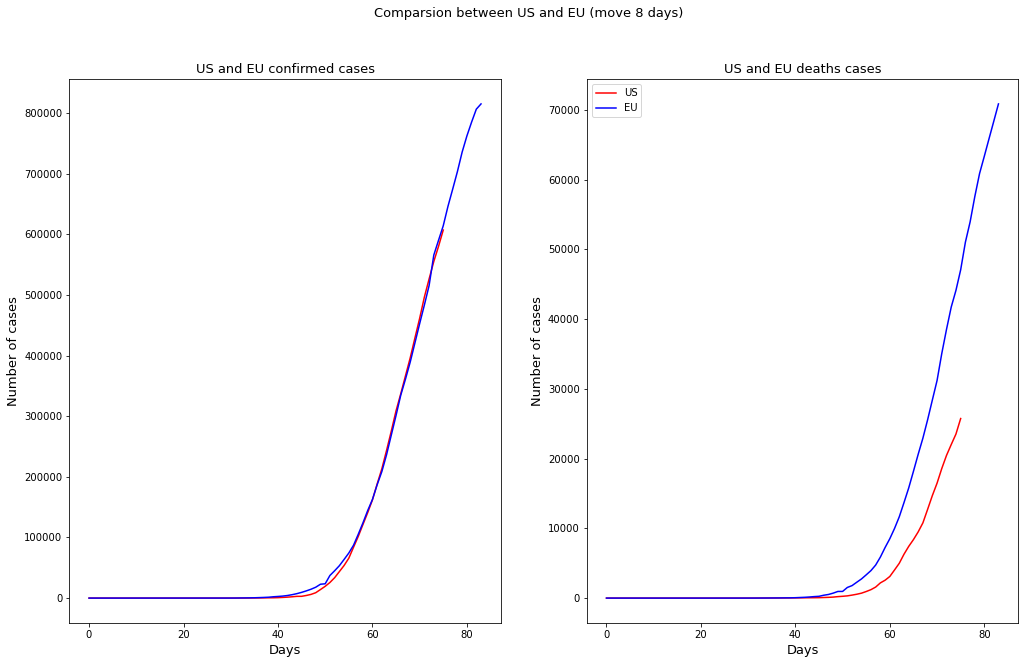

In [8]:
# plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(17,10))
confirmed_US_2.plot(ax=ax1,color='r',label = 'US')
deaths_US_2.plot(ax=ax2,color='r',label = 'US')
confirmed_EU_2.plot(ax=ax1,color='b',label = 'EU')
deaths_EU_2.plot(ax=ax2,color='b',label = 'EU')
# setting
fig.suptitle('Comparsion between US and EU (move 8 days)', size=13)
ax1.set_title("US and EU confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Days", size=13)
ax2.set_title("US and EU deaths cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Days", size=13)
# show
plt.legend()
plt.savefig("../graphs/Comparsion between US and EU (move 8 days)")

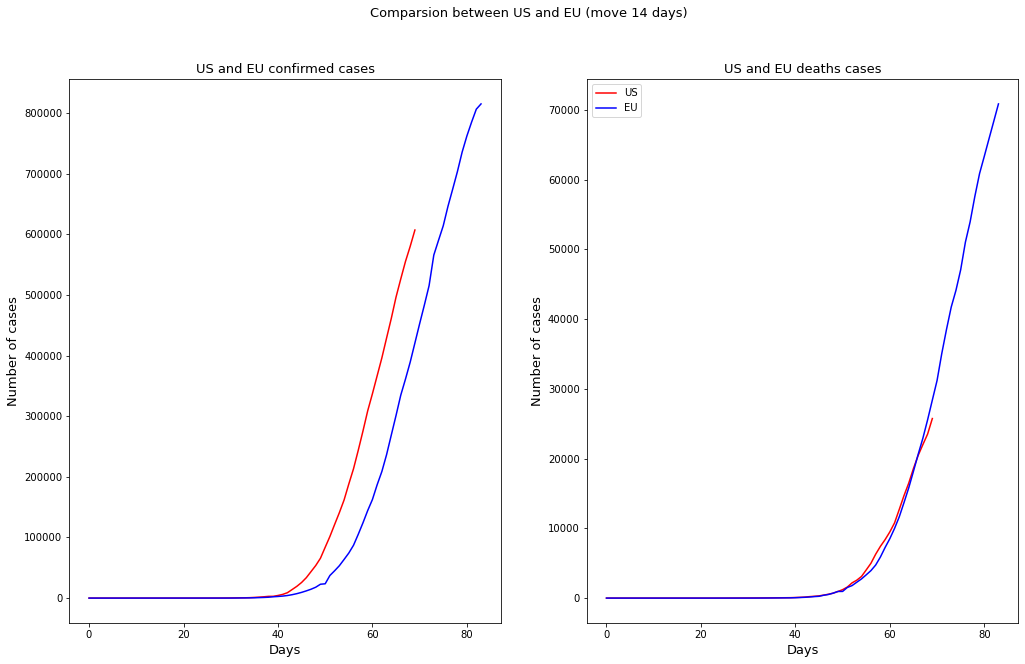

In [9]:
move = 14
days_EU = len(confirmed_EU.index)
days_US = len(confirmed_US[move:].index)
confirmed_EU_2 = pd.Series(confirmed_EU.values, [i for i in range(days_EU)])
deaths_EU_2 = pd.Series(deaths_EU.values, [i for i in range(days_EU)])
confirmed_US_2 = pd.Series(confirmed_US.values[move:], [i for i in range(days_US)])
deaths_US_2 = pd.Series(deaths_US.values[move:], [i for i in range(days_US)])
# plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(17,10))
confirmed_US_2.plot(ax=ax1,color='r',label = 'US')
deaths_US_2.plot(ax=ax2,color='r',label = 'US')
confirmed_EU_2.plot(ax=ax1,color='b',label = 'EU')
deaths_EU_2.plot(ax=ax2,color='b',label = 'EU')
# setting
fig.suptitle('Comparsion between US and EU (move 14 days)', size=13)
ax1.set_title("US and EU confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Days", size=13)
ax2.set_title("US and EU deaths cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Days", size=13)
# show
plt.legend()
plt.savefig("../graphs/Comparsion between US and EU (move 14 days)")

In [10]:
submission_example = pd.read_csv("../input/covid19-global-forecasting-week-4/submission.csv")
test = pd.read_csv("../input/covid19-global-forecasting-week-4/test.csv")
train = pd.read_csv("../input/covid19-global-forecasting-week-4/train.csv")

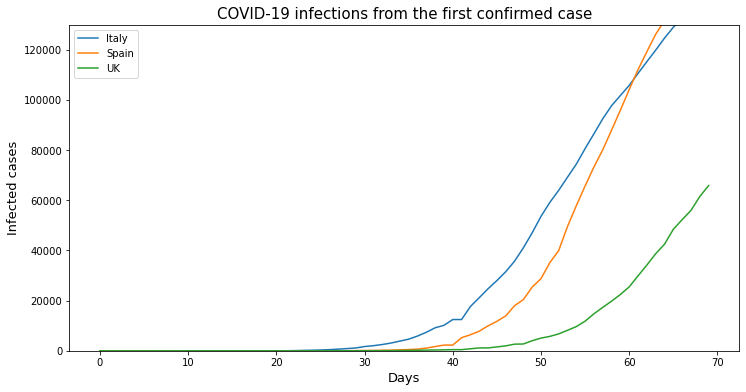

In [11]:
#Italy
confirmed_total_date_Italy = train[(train['Country_Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[(train['Country_Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = train[(train['Country_Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[(train['Country_Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

# UK
confirmed_total_date_UK = train[(train['Country_Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[(train['Country_Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#Australia
confirmed_total_date_Australia = train[(train['Country_Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Australia = train[(train['Country_Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

#confirmed_country_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
# confirmed_total_date_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
# fatalities_total_date_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
# total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

italy = [i for i in total_date_Italy.ConfirmedCases['sum'].values]
italy_30 = italy[0:70] 
spain = [i for i in total_date_Spain.ConfirmedCases['sum'].values]
spain_30 = spain[0:70] 
UK = [i for i in total_date_UK.ConfirmedCases['sum'].values]
UK_30 = UK[0:70] 

# Plots
plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.legend(["Italy", "Spain", "UK"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.savefig('../graphs/More countries')
plt.show()